Ships and Bikes model:

In [1]:
from bs4 import BeautifulSoup
import numpy as np
import requests
import cv2
import PIL.Image
import urllib
import matplotlib.pyplot as plt
%matplotlib inline
%tensorflow_version 2.x
import tensorflow as tf
print(tf.__version__)


TensorFlow 2.x selected.
2.0.0


TensorFlow 2.x selected.


In [0]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [2]:
ships_page = requests.get("http://www.image-net.org/api/text/imagenet.synset.geturls?wnid=n04194289")#ship synset
print(ships_page.content)
# BeautifulSoup is an HTML parsing library
ships_soup = BeautifulSoup(ships_page.content, 'html.parser')#puts the content of the website into the soup variable, each url on a different line

bikes_page = requests.get("http://www.image-net.org/api/text/imagenet.synset.geturls?wnid=n02834778")#bicycle synset
print(bikes_page.content)
# BeautifulSoup is an HTML parsing library
from bs4 import BeautifulSoup
bikes_soup = BeautifulSoup(bikes_page.content, 'html.parser')#puts the content of the website into the soup variable, each url on a different line

b"http://static.flickr.com/85/233578996_8f74463083.jpg\r\nhttp://farm3.static.flickr.com/2317/2472759369_f4cc1ff8a0.jpg\r\nhttp://static.flickr.com/2173/2071797511_200e3e4d2e.jpg\r\nhttp://farm2.static.flickr.com/1019/534041866_3aa182311c.jpg\r\nhttp://static.flickr.com/88/231940102_7beb5ecf3e.jpg\r\nhttp://farm4.static.flickr.com/3138/2724596903_d74dd64821.jpg\r\nhttp://static.flickr.com/174/453920264_9406e9972c.jpg\r\nhttp://farm2.static.flickr.com/1419/1408865234_caf87d02e3.jpg\r\nhttp://farm1.static.flickr.com/147/423542865_c091691a6b.jpg\r\nhttp://farm3.static.flickr.com/2074/2367492616_272bf6af6a.jpg\r\nhttp://farm2.static.flickr.com/1081/1365111200_8d105d9fb1.jpg\r\nhttp://farm3.static.flickr.com/2269/2348294071_94fc609f4a.jpg\r\nhttp://static.flickr.com/1016/1443997081_b5eb875055.jpg\r\nhttp://www.walleniuslines.com/img_upload/maersk_teal.jpg\r\nhttp://www.fondear.org/infonautic/Barco/Barco_Navegando/Contenedores_Peligro/sea_container_ship2.jpg\r\nhttp://static.flickr.com/198/4

Split the URLs (each on a separate line) and store in a list

In [3]:
str_ships_soup=str(ships_soup)#convert soup to string so it can be split
type(str_ships_soup)
ships_split_urls=str_ships_soup.split('\r\n')#split so each url is a different possition on a list
print("The length of the ships list is ",len(ships_split_urls))#print the length of the list so you know how many urls you have

bikes_str_soup=str(bikes_soup)#convert soup to string so it can be split
type(bikes_str_soup)
bikes_split_urls=bikes_str_soup.split('\r\n')#split so each url is a different possition on a list
print("The length of the bikes list is ", len(bikes_split_urls))

The length of the ships list is  1262
The length of the bikes list is  1345


Make training and validation directories

In [0]:
!mkdir /content/train #create the Train folder
!mkdir /content/train/ships #create the ships folder
!mkdir /content/train/bikes #create the bikes folder
!mkdir /content/validation
!mkdir /content/validation/ships #create the ships folder
!mkdir /content/validation/bikes #create the bikes folder

Correct the images shape, format, and store them on the corresponding directory

In [5]:
img_rows, img_cols = 32, 32 #number of rows and columns to convert the images to
input_shape = (img_rows, img_cols, 3)#format to store the images (rows, columns,channels) called channels last
def url_to_image(url):
 # download the image, convert it to a NumPy array, and then read
 # it into OpenCV format
 resp = urllib.request.urlopen(url)
 image = np.asarray(bytearray(resp.read()), dtype="uint8")
 image = cv2.imdecode(image, cv2.IMREAD_COLOR)
 
 # return the image
 return image

n_of_training_images=1000 #the number of training images to use
for progress in range(n_of_training_images):#store all the images on a directory
    # Print out progress whenever progress is a multiple of 20 so we can follow the
    # (relatively slow) progress
    if(progress%20==0):
        print(progress)
    if not ships_split_urls[progress] == None:
      try:
        I = url_to_image(ships_split_urls[progress])
        if (len(I.shape))==3: #check if the image has width, length and channels
          save_path = '/content/train/ships/img'+str(progress)+'.jpg'#create a name of each image
          cv2.imwrite(save_path,I)
      except:
        None

#do the same for bikes:
for progress in range(n_of_training_images):#store all the images on a directory
    # Print out progress whenever progress is a multiple of 20 so we can follow the
    # (relatively slow) progress
    if(progress%20==0):
        print(progress)
    if not bikes_split_urls[progress] == None:
      try:
        I = url_to_image(bikes_split_urls[progress])
        if (len(I.shape))==3: #check if the image has width, length and channels
          save_path = '/content/train/bikes/img'+str(progress)+'.jpg'#create a name of each image
          cv2.imwrite(save_path,I)
      except:
        None
        
        
        
#Validation data:
for progress in range(50):#store all the images on a directory
    # Print out progress whenever progress is a multiple of 20 so we can follow the
    # (relatively slow) progress
    if(progress%20==0):
        print(progress)
    if not ships_split_urls[progress] == None:
      try:
        I = url_to_image(ships_split_urls[n_of_training_images+progress])#get images that are different from the ones used for training
        if (len(I.shape))==3: #check if the image has width, length and channels
          save_path = '/content/validation/ships/img'+str(progress)+'.jpg'#create a name of each image
          cv2.imwrite(save_path,I)
      except:
        None

#do the same for bikes:
for progress in range(50):#store all the images on a directory
    # Print out progress whenever progress is a multiple of 20 so we can follow the
    # (relatively slow) progress
    if(progress%20==0):
        print(progress)
    if not bikes_split_urls[progress] == None:
      try:
        I = url_to_image(bikes_split_urls[n_of_training_images+progress])#get images that are different from the ones used for training
        if (len(I.shape))==3: #check if the image has width, length and channels
          save_path = '/content/validation/bikes/img'+str(progress)+'.jpg'#create a name of each image
          cv2.imwrite(save_path,I)
      except:
        None
        
print("\nTRAIN:\n")          
print("\nlist the files inside ships directory:\n")        
!ls /content/train/ships #list the files inside ships
print("\nlist the files inside bikes directory:\n")
!ls /content/train/bikes #list the files inside bikes
print("\nVALIDATION:\n")
print("\nlist the files inside ships directory:\n")        
!ls /content/validation/ships #list the files inside ships
print("\nlist the files inside bikes directory:\n")
!ls /content/validation/bikes #list the files inside bikes


0
20
40
60
80
100
120
140
160
180
200
220
240
260
280
300
320
340
360
380
400
420
440
460
480
500
520
540
560
580
600
620
640
660
680
700
720
740
760
780
800
820
840
860
880
900
920
940
960
980
0
20
40
60
80
100
120
140
160
180
200
220
240
260
280
300
320
340
360
380
400
420
440
460
480
500
520
540
560
580
600
620
640
660
680
700
720
740
760
780
800
820
840
860
880
900
920
940
960
980
0
20
40
0
20
40

TRAIN:


list the files inside ships directory:

img0.jpg    img262.jpg	img395.jpg  img554.jpg	img692.jpg  img842.jpg
img102.jpg  img264.jpg	img396.jpg  img556.jpg	img693.jpg  img843.jpg
img103.jpg  img265.jpg	img399.jpg  img557.jpg	img694.jpg  img844.jpg
img105.jpg  img267.jpg	img39.jpg   img558.jpg	img697.jpg  img845.jpg
img107.jpg  img268.jpg	img3.jpg    img55.jpg	img698.jpg  img849.jpg
img108.jpg  img26.jpg	img400.jpg  img560.jpg	img699.jpg  img851.jpg
img111.jpg  img270.jpg	img401.jpg  img562.jpg	img69.jpg   img852.jpg
img113.jpg  img271.jpg	img404.jpg  img563.jpg	img6.jpg    img853.

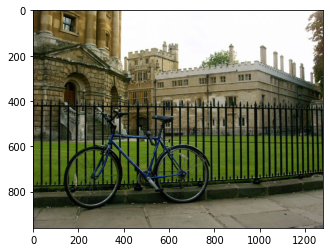

In [6]:

test=PIL.Image.open("/content/train/bikes/img9.jpg")
plt.imshow(test)

Building the model:

In [29]:

model=tf.keras.models.Sequential([
    #The first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(img_rows, img_cols, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.5),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Dropping 50% of the weights
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class  and 1 for the other.
    tf.keras.layers.Dense(1, activation='sigmoid')                               
])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 30, 30, 16)        448       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 15, 15, 16)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 15, 15, 16)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 13, 13, 32)        4640      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 4, 4, 64)          18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 2, 2, 64)         

In [0]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

(Insert CallBack if needed)

In [31]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
# Data augmentation only on the training dataset
train_datagen = ImageDataGenerator(
    rescale=1/255,
    rotation_range=90,
    horizontal_flip=True,
    brightness_range=[0.5,1.5],
    fill_mode='nearest'
)
                                   
validation_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        '/content/train/',  # This is the source directory for training images
        target_size=(32, 32),  # All images will be resized to 150x150
        batch_size=512,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = validation_datagen.flow_from_directory(
        '/content/validation/',  # This is the source directory for training images
        target_size=(32, 32),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

Found 1270 images belonging to 2 classes.
Found 65 images belonging to 2 classes.


Training the model:

In [32]:
history=model.fit_generator(
    train_generator,
    steps_per_epoch=2,
    epochs=20,
    verbose=1,
    validation_data=validation_generator,
    validation_steps=3
)

Epoch 1/20
2/2 [==============================] - 5s 2s/step - loss: 0.7396 - acc: 0.4934 - val_loss: 0.6853 - val_acc: 0.5667
Epoch 2/20
2/2 [==============================] - 5s 3s/step - loss: 0.6900 - acc: 0.5146 - val_loss: 0.6827 - val_acc: 0.6167
Epoch 3/20
2/2 [==============================] - 4s 2s/step - loss: 0.6880 - acc: 0.5633 - val_loss: 0.6590 - val_acc: 0.5667
Epoch 4/20
2/2 [==============================] - 4s 2s/step - loss: 0.6928 - acc: 0.4960 - val_loss: 0.6680 - val_acc: 0.6667
Epoch 5/20
2/2 [==============================] - 4s 2s/step - loss: 0.6709 - acc: 0.6794 - val_loss: 0.6278 - val_acc: 0.7667
Epoch 6/20
2/2 [==============================] - 5s 3s/step - loss: 0.6458 - acc: 0.6660 - val_loss: 0.7430 - val_acc: 0.4333
Epoch 7/20
2/2 [==============================] - 5s 3s/step - loss: 0.7012 - acc: 0.6338 - val_loss: 0.5895 - val_acc: 0.7333
Epoch 8/20
2/2 [==============================] - 3s 1s/step - loss: 0.6001 - acc: 0.7215 - val_loss: 0.5689 - 

Plotting training and validation loss:

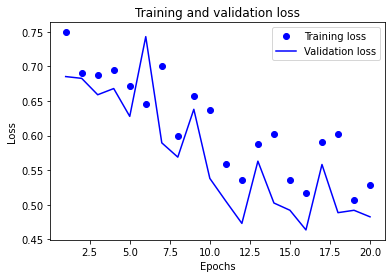

In [33]:
history_dict=history.history
history_dict.keys()
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, 21)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show() 

Plotting training and validation accuracy:

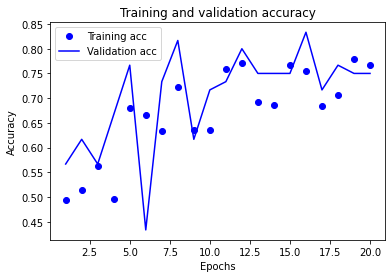

In [34]:
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show() 

Running the model with novel images:

In [14]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(32, 32))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a bicycle")
  else:
    print(fn + " is a ship")

Using TensorFlow backend.
